In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# random_state=0 ensures that shuffling happens the same every time the code is run. (0 is the random seed given)
# '(frac=1)' ensures the effect applies to the entire dataset (frac=0.5 for half the dataset)
# 'reset_index()' changes the index values of all the rows and 'drop=True' drops the previous indices

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica
4,5.0,3.4,NaN,0.2,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica
6,NaN,3.5,1.3,0.3,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor
9,6.1,2.8,4.0,1.3,Iris-versicolor


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  145 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
for var in df.columns:
    print(df[var].value_counts())

sepal_length
5.0    9
6.3    9
6.7    8
5.7    8
5.8    7
6.4    7
5.1    7
5.5    7
6.0    6
4.9    6
5.4    6
5.6    6
6.1    6
6.5    5
4.8    5
6.9    4
7.7    4
4.6    4
6.2    4
6.8    3
5.2    3
7.2    3
5.9    3
4.4    3
4.7    2
6.6    2
7.3    1
7.0    1
5.3    1
4.3    1
7.1    1
4.5    1
7.6    1
7.9    1
7.4    1
Name: count, dtype: int64
sepal_width
3.0    26
2.8    14
3.4    12
3.1    12
3.2    12
2.9    10
2.7     9
2.5     8
3.8     6
3.3     6
3.5     6
2.6     5
2.3     4
3.6     3
2.2     3
2.4     3
3.7     3
3.9     2
2.0     1
4.2     1
4.4     1
4.1     1
Name: count, dtype: int64
petal_length
1.5    13
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.7     5
4.0     5
4.9     4
5.0     4
4.2     4
1.7     4
4.4     3
3.9     3
4.1     3
5.8     3
5.7     3
4.8     3
6.1     3
5.5     3
4.6     3
5.2     2
6.7     2
1.2     2
5.4     2
5.9     2
5.3     2
1.9     2
4.3     2
3.3     2
3.5     2
6.0     2
3.6     1
1.1     1
3.0     1
6.3     1
6.6  

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
df.isnull().sum()

sepal_length    4
sepal_width     2
petal_length    5
petal_width     4
species         0
dtype: int64

In [10]:
df.isna().sum()

sepal_length    4
sepal_width     2
petal_length    5
petal_width     4
species         0
dtype: int64

In [11]:
df['species'].value_counts()

species
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: count, dtype: int64

### CONVERTING SPECIES TO NUMERIC VALUES -> EASY TO VISUALIZE

In [12]:
replace_dict = {"Iris-setosa":"1", "Iris-versicolor":"2", "Iris-virginica":"3"}
df['species'] = df['species'].replace(replace_dict)

In [13]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,3
1,6.0,2.2,4.0,1.0,2
2,5.5,4.2,1.4,0.2,1
3,7.3,2.9,6.3,1.8,3
4,5.0,3.4,NaN,0.2,1
5,6.3,3.3,6.0,2.5,3
6,NaN,3.5,1.3,0.3,1
7,6.7,3.1,4.7,1.5,2
8,6.8,2.8,4.8,1.4,2
9,6.1,2.8,4.0,1.3,2


In [14]:
df['species'] = pd.to_numeric(df['species'], errors='coerce')
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

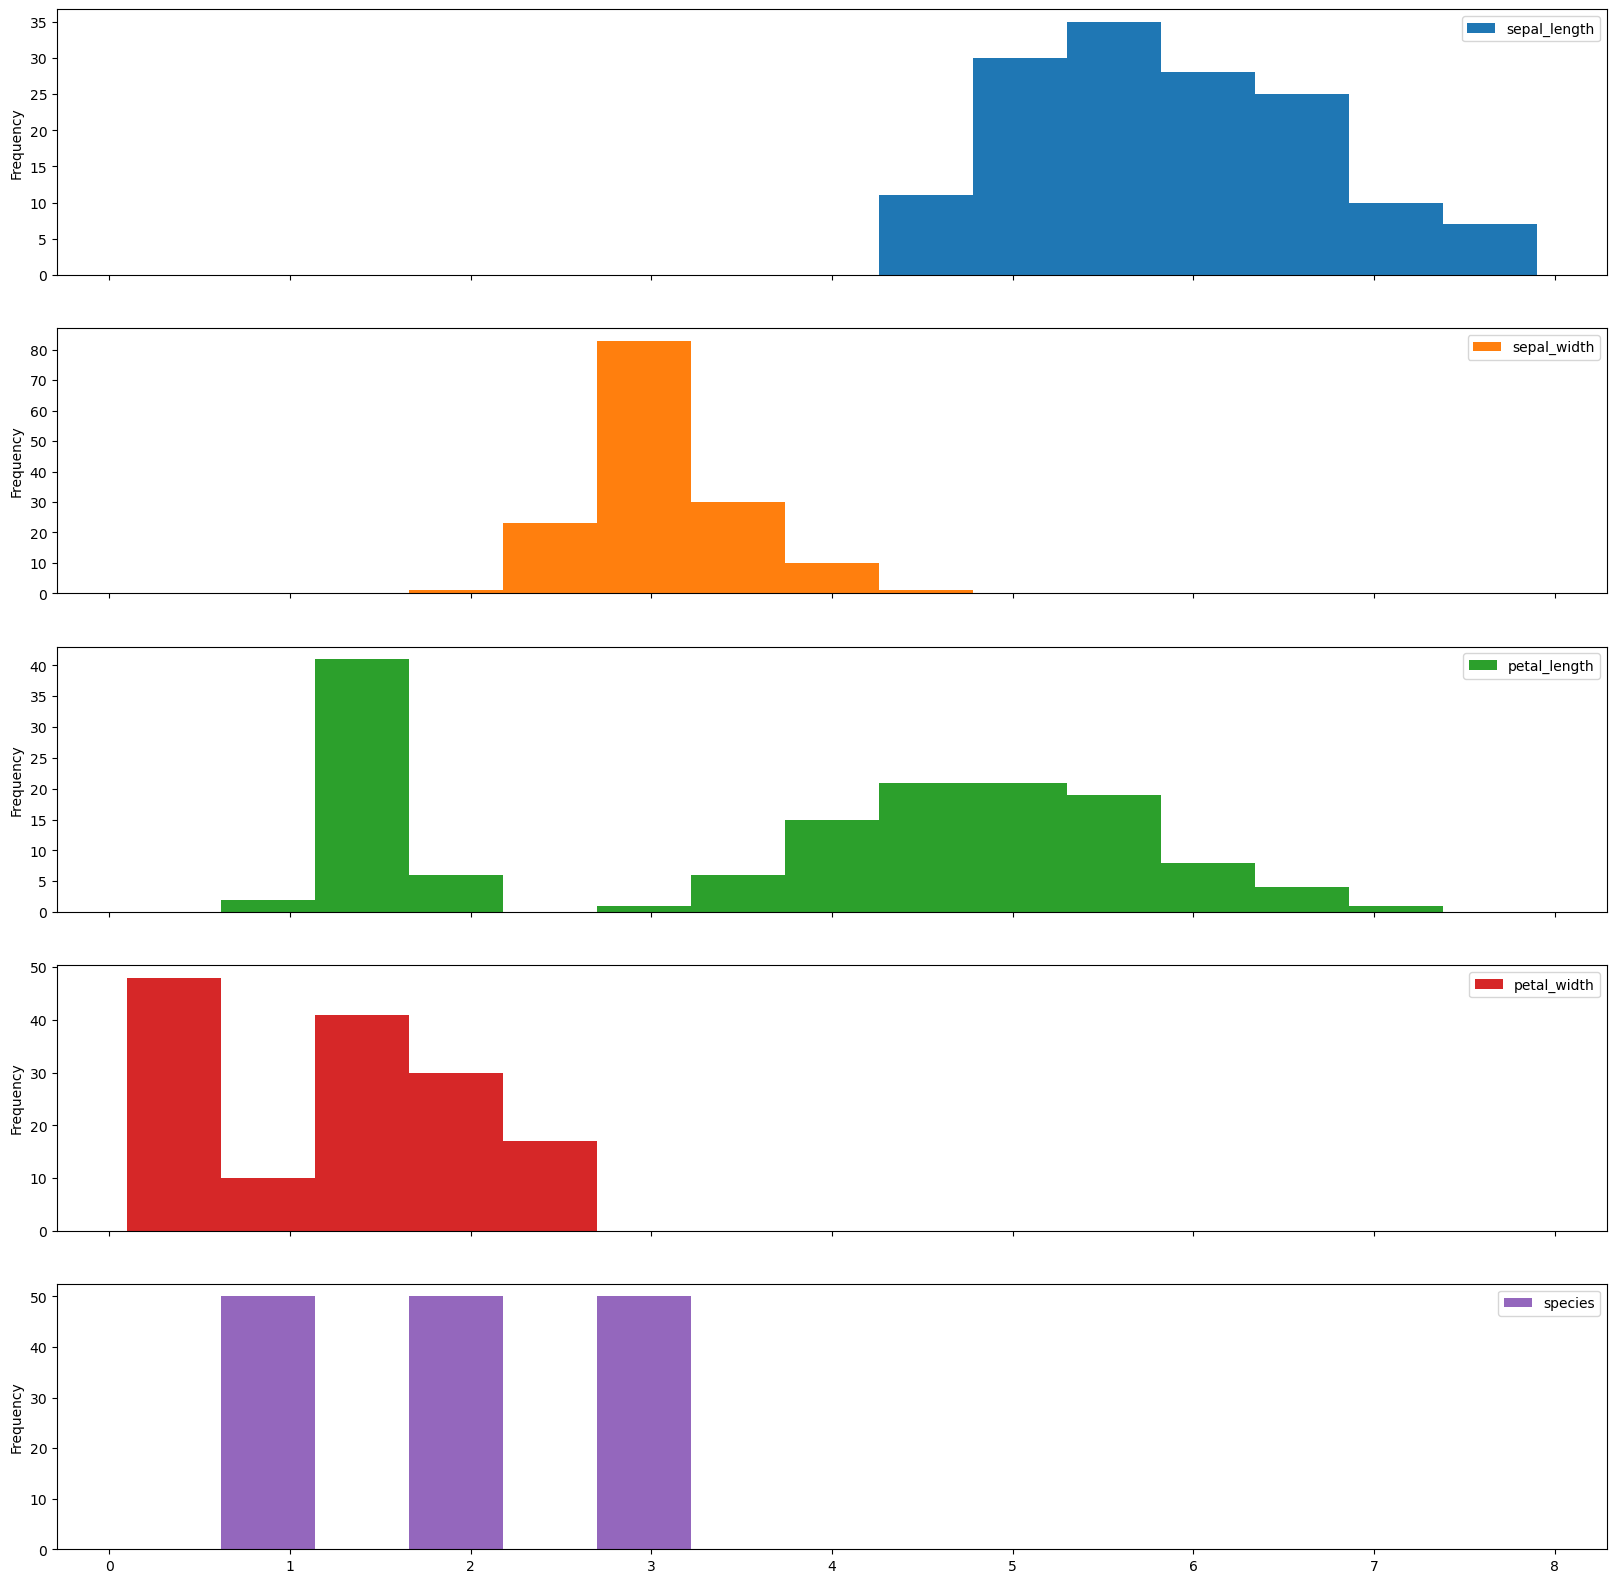

In [15]:
plt.rcParams['figure.figsize']=(20,20)
#sets the figure-size of figure (figure.figsize) runtime configuration parameter (rcParams) of matplotlib (plt) as 20x20 (inches)
df.plot(kind='hist', bins=15, subplots=True, layout=(5,1))
#plots a histogram made of 15 bins(intervals) and the plot will have subplots(for each colunmn) and the layout will be 3x2
plt.show()

In [16]:
correlation=df.corr()

In [17]:
correlation['species'].sort_values(ascending=True)

sepal_width    -0.415346
sepal_length    0.779586
petal_length    0.951477
petal_width     0.955973
species         1.000000
Name: species, dtype: float64

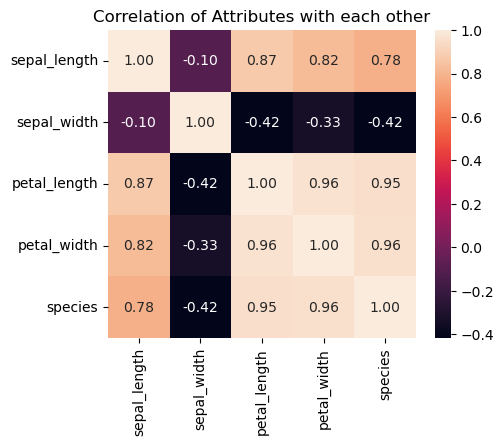

In [18]:
plt.figure(figsize=(5,4))
plt.title('Correlation of Attributes with each other')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
#fmt sets the format of annotations to 2 decimal places and linecolor defines the color of the line separating 2 cells 

In [19]:
features = df.drop(['species'], axis=1)
# 'axis=1' indicate that the dropping shoul be of a column 'axis=0' indicates that of a row
target = df['species']

In [20]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.8,2.8,5.1,2.4
1,6.0,2.2,4.0,1.0
2,5.5,4.2,1.4,0.2
3,7.3,2.9,6.3,1.8
4,5.0,3.4,NaN,0.2


In [21]:
target.head()

0    3
1    2
2    1
3    3
4    1
Name: species, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [23]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((120, 4), (30, 4), (120,), (30,))

In [24]:
features_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [25]:
features_train.isnull().sum()

sepal_length    4
sepal_width     2
petal_length    5
petal_width     3
dtype: int64

In [26]:
features_test.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     1
dtype: int64

In [27]:
#percentage of null values in each column
for col in features_train.columns:
    if features_train[col].isnull().sum()!=0:
        print(col, round(features_train[col].isnull().mean(),4))

sepal_length 0.0333
sepal_width 0.0167
petal_length 0.0417
petal_width 0.025


In [28]:
#percentage of null values in each column
for col in features_test.columns:
    if features_test[col].isnull().sum()!=0:
        print(col, round(features_test[col].isnull().mean(),4))

petal_width 0.0333


In [29]:
for df1 in [features_train, features_test]:
    for col in df1.columns:
        df1[col].fillna(df1[col].median(), inplace=True)

In [30]:
features_train.isnull().sum(), features_test.isnull().sum()

(sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 dtype: int64,
 sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 dtype: int64)

In [31]:
cols = features_test.columns
print(cols)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [33]:
features_train = pd.DataFrame(features_train, columns = [cols])
features_test = pd.DataFrame(features_test, columns=[cols])

In [34]:
features_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.059585,-0.808422,0.794941,0.938712
1,1.320281,0.377527,1.143091,1.475758
2,0.442184,-0.334042,0.330742,0.133143
3,-0.185028,-0.571232,0.214692,0.133143
4,0.567627,-1.282802,0.678891,0.401666


In [35]:
features_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,2.323820,-1.045612,1.839390,1.475758
1,-0.059585,-0.808422,0.794941,0.938712
2,0.316742,-0.096853,0.678891,0.804450
3,-0.812240,0.851907,-1.351980,-1.343734
4,1.069396,0.140337,0.562842,0.401666


In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
predict_test_main = KNN.predict(features_test)
predict_test_main

array([3, 3, 3, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2,
       2, 2, 3, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
KNN.predict_proba(features_test)[:,0]

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [39]:
KNN.predict_proba(features_test)[:,1]

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.33333333, 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.66666667, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [40]:
KNN.predict_proba(features_test)[:,2]

array([1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.66666667, 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.33333333, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [41]:
from sklearn.metrics import accuracy_score
accu_3 = accuracy_score(predict_test_main, target_test)
print('Model Accuracy is {0:0.4f}'.format(accu_3))

Model Accuracy is 0.9333


In [42]:
predict_train = KNN.predict(features_train)
print('Model Accuracy with Training Set is {0:0.4f}'.format(accuracy_score(predict_train, target_train)))

Model Accuracy with Training Set is 0.9500


In [43]:
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_4 = accuracy_score(predict_test, target_test)
print('Model Accuracy with K=4 is {0:0.4f}'.format(accu_4))

Model Accuracy with K=4 is 0.9000


In [44]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_5 = accuracy_score(predict_test, target_test)
print('Model Accuracy with K=5 is {0:0.4f}'.format(accu_5))

Model Accuracy with K=5 is 0.9333


In [45]:
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_6 = accuracy_score(predict_test, target_test)
print('Model Accuracy with K=6 is {0:0.4f}'.format(accu_6))

Model Accuracy with K=6 is 0.9333


In [46]:
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_7 = accuracy_score(predict_test, target_test)
print('Model Accuracy with K=7 is {0:0.4f}'.format(accu_7))

Model Accuracy with K=7 is 0.9000


In [47]:
KNN = KNeighborsClassifier(n_neighbors = 8)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_8 = accuracy_score(predict_test_main, target_test)
print('Model Accuracy with K=8 is {0:0.4f}'.format(accu_8))

Model Accuracy with K=8 is 0.9333


In [48]:
KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_9 = accuracy_score(predict_test, target_test)
print('Model Accuracy with K=4 is {0:0.4f}'.format(accu_9))

Model Accuracy with K=4 is 0.9333


In [49]:
KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(features_train, target_train)
predict_test = KNN.predict(features_test)
accu_10 = accuracy_score(predict_test, target_test)
print('Model Accuracy with K=10 is {0:0.4f}'.format(accu_10))

Model Accuracy with K=10 is 0.9333


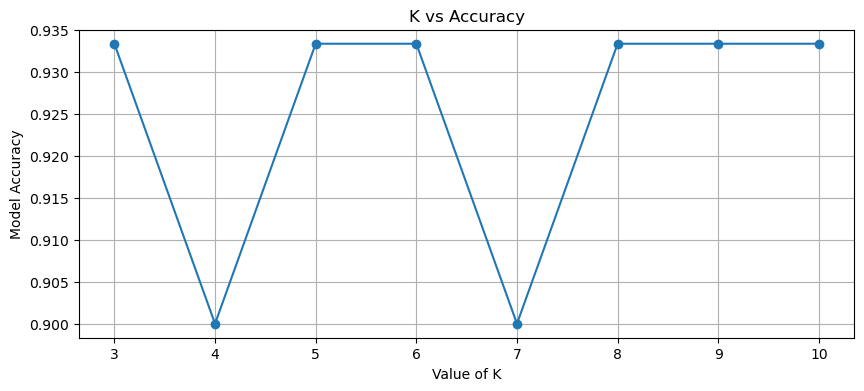

In [50]:
# Step 1: Prepare Data
x = [3, 4, 5, 6, 7, 8, 9, 10]  # x-axis values
y = [accu_3, accu_4, accu_5, accu_6, accu_7, accu_8, accu_9, accu_10]  # y-axis values (squared values for this example)
plt.figure(figsize = (10, 4))
# Step 2: Create the Plot
plt.plot(x, y, marker='o', linestyle='-')

# Step 3: Customize the Plot
plt.xlabel('Value of K')  # Add x-axis label
plt.ylabel('Model Accuracy')  # Add y-axis label
plt.title('K vs Accuracy')  # Add title
plt.grid(True)  # Show grid

# Step 4: Display the Plot
plt.show()


In [51]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(predict_test_main, target_test)

print(CM)

[[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]


# Confusion Matrix
![3x3 Confusion Matrix](.\confusion_matrix.png)

In [52]:
# Correct predictions
print("TP_1: ", CM[0,0])
print("TP_2: ", CM[1,1])
print("TP_3: ", CM[2,2])

# Was 1 (Iris Setosa) but predicted otherwise
print("\nFP_2_1: ", CM[0,1])
print("FP_3_1: ", CM[0,2])

# Was 2 (Iris Versicolor) but predicted otherwise
print("\nFP_1_2: ", CM[1,0])
print("FP_3_2: ", CM[1,2])

# Was 3 (Iris Virginica) but predicted otherwise
print("\nFP_1_3: ", CM[2,0])
print("FP2_3: ", CM[2,1])

TP_1:  10
TP_2:  7
TP_3:  11

FP_2_1:  0
FP_3_1:  0

FP_1_2:  0
FP_3_2:  1

FP_1_3:  0
FP2_3:  1


<Axes: >

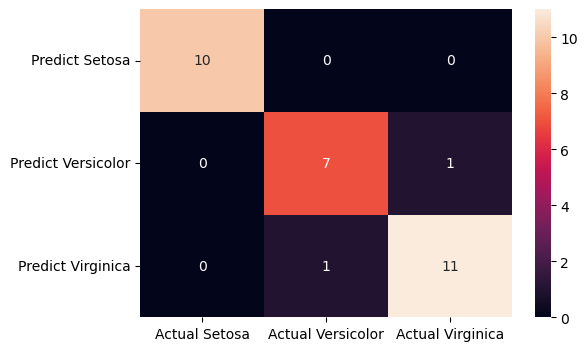

In [53]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=CM, columns=['Actual Setosa', 'Actual Versicolor', 'Actual Virginica'], index=['Predict Setosa', 'Predict Versicolor', 'Predict Virginica'])
sns.heatmap(cm_matrix, annot=True)

KNN internal working 

k-fold techniques

learning rate

epoc

overfitting-underfitting

svm vs knn ->new dataset -> medical / object classification -> PARKINSON'S

EEG image dataset

WORD FILE EXPLAINING ENTIRE PROCESS